In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset
# 新增
import meshio 
import h5py
import scipy.interpolate

In [2]:
mesh=meshio.read('Data/UnstructuredGrid/porous1.vtu')
print(mesh)

<meshio mesh object>
  Number of points: 20606
  Number of cells:
    triangle: 41292
  Point data: RegionId
  Cell data: RegionId


In [31]:
x,y,z=mesh.points[:,0],mesh.points[:,1],mesh.points[:,2]
triangles=mesh.cells[0].data
pointdata=mesh.point_data['RegionId']
celldata=mesh.cell_data['RegionId'][0]
print(celldata)
print(np.unique(z))
print(triangles[1:3,:])

[0 0 0 ... 3 3 3]
[0. 1.]
[[1 7 2]
 [1 3 7]]


41292 41292


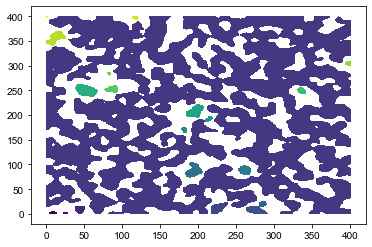

In [32]:
fig=plt.figure()
ax=plt.gca()
# 分离
z1_triangles, z2_triangles, z3_triangles=z[triangles[:,0]], z[triangles[:,1]], z[triangles[:,2]]
z0=np.min(z)
ind_triangles_z0=((z1_triangles == z0) & (z2_triangles == z0) &(z3_triangles == z0))
# ax.triplot(x,y,triangles[ind_triangles_z0,:])
# 
# ax.tricontourf(x,y,triangles,pointdata)
ax.tripcolor(x,y,triangles, facecolors=celldata)
plt.show()

In [36]:
meshfile='Data/UnstructuredGrid/XDMF/MESH.h5'
fieldfile='Data/UnstructuredGrid/XDMF/Data_06000.h5'
MESH=h5py.File(meshfile,'r')
VAR=h5py.File(fieldfile,'r')
print(MESH.keys(), VAR.keys())

<KeysViewHDF5 ['BoundaryPolygon_ptID', 'EL2NOD', 'GCOORD', 'PhaseID', 'PointID']> <KeysViewHDF5 ['Cca', 'Cso4', 'Kr', 'P', 'Perm', 'Perm_log', 'Rho_f', 'S_CaSO4', 'S_FeS2', 'T', 'Vx', 'Vz']>


In [55]:
GCOORD=MESH['GCOORD'][:]
x,y=GCOORD[:,0],GCOORD[:,1]
triangles=MESH['EL2NOD'][:]
triangles=triangles.reshape(-1,4)
triangles=triangles[:,1:4]
# 
print(len(triangles),"个三角形", len(x),'个点')
phaseID=MESH['PhaseID'][:]
phaseID_unique=np.unique(phaseID)
print(phaseID_unique)

74044 个三角形 37319 个点
[1 2]


(200, 600) (200, 600)


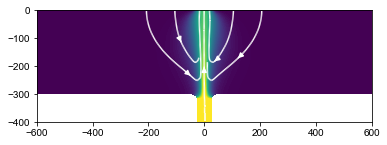

In [86]:
fig=plt.figure()

ax=plt.gca()
ax.axis('scaled')
ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(np.min(y),np.max(y))
# for phaseid in phaseID_unique:
#     ax.triplot(x,y,triangles[phaseID==phaseid,:], lw=0.2,label=phaseid)
# # ax.legend(handles=(),labels=())

var=VAR['T'][:]
ax.tricontourf(x,y,triangles,var,levels=100,extend='both')
# ax.tricontour(x,y,triangles,var,colors='w')

vx=VAR['Vx'][:]
vy=VAR['Vz'][:]
YY,XX = np.mgrid[np.min(y):np.max(y):200j, np.min(x):np.max(x):600j]
print(YY.shape,XX.shape)
VX = scipy.interpolate.griddata((x,y),vx, (XX.reshape(-1,),YY.reshape(-1,)) , method='cubic').ravel()
VY = scipy.interpolate.griddata((x,y),vy, (XX.reshape(-1,),YY.reshape(-1,)) , method='cubic').ravel()
VX=VX.reshape(XX.shape)
VY=VY.reshape(XX.shape)
seed_x=[-200,-100,0,100,200]
seed_y=np.zeros_like(seed_x)-50
seed_points=np.array([seed_x,seed_y])

ax.streamplot(XX,YY,VX,VY,density=[4,2], start_points=seed_points.T, color='w')

plt.show()